### 项目简介：

该数据集包含了学生的特征数据以及成绩数据，通过建立机器学习模型，来对学生的成绩进行预测。

In [2]:
#导入该任务需要用到的包

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
#导入数据集

df = pd.read_csv('D:\\Py_dataset\\StudentPerformance.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


#### 特征说明

* gender：性别
* Nationality：国籍
* PlaceofBirth：出生地
* StageID：学校级别（小学，中学，高中）
* GradeID：年纪（G01-G12）
* SectionID：班级
* Topic：科目
* Semester：学期（春季学期，秋季学期）
* Relation：孩子家庭教育的负责人（父亲，母亲）
* raisehands：课堂举手次数
* VislTedResources：学生浏览在线课件的次数
* AnnoucementsView：学生浏览学校公告的册数
* Discussion：学生参与课堂讨论的次数
* ParentAnsweringSurvey：家长是否填写了学校的问卷调查（是，否）
* ParentschoolSatisfaction：家长对于学校的满意程度（好，不好）
* StudentAbsenceDays：学生缺勤次数
* Class：成绩等级

In [4]:
df.shape

(480, 17)

In [5]:
#查看缺失值

df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
gender                      480 non-null object
NationalITy                 480 non-null object
PlaceofBirth                480 non-null object
StageID                     480 non-null object
GradeID                     480 non-null object
SectionID                   480 non-null object
Topic                       480 non-null object
Semester                    480 non-null object
Relation                    480 non-null object
raisedhands                 480 non-null int64
VisITedResources            480 non-null int64
AnnouncementsView           480 non-null int64
Discussion                  480 non-null int64
ParentAnsweringSurvey       480 non-null object
ParentschoolSatisfaction    480 non-null object
StudentAbsenceDays          480 non-null object
Class                       480 non-null object
dtypes: int64(4), object(13)
memory usage: 63.8+ KB


In [7]:
df.describe(include = 'all')

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
count,480,480,480,480,480,480,480,480,480,480.000000,480.000000,480.000000,480.000000,480,480,480,480
unique,2,14,14,3,10,3,12,2,2,NaN,NaN,NaN,NaN,2,2,2,3
top,M,KW,KuwaIT,MiddleSchool,G-02,A,IT,F,Father,NaN,NaN,NaN,NaN,Yes,Good,Under-7,M
freq,305,179,180,248,147,283,95,245,283,NaN,NaN,NaN,NaN,270,292,289,211
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.775000,54.797917,37.918750,43.283333,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.779223,33.080007,26.611244,27.637735,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.750000,20.000000,14.000000,20.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,65.000000,33.000000,39.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.000000,84.000000,58.000000,70.000000,NaN,NaN,NaN,NaN


In [8]:
#查看类别特征

print('Relation:',df['Relation'].unique())

Relation: ['Father' 'Mum']


In [9]:
print('Stage:',df['StageID'].unique())

Stage: ['lowerlevel' 'MiddleSchool' 'HighSchool']


In [10]:
print('StudentAbsenceDays:',df['StudentAbsenceDays'].unique())

StudentAbsenceDays: ['Under-7' 'Above-7']


In [11]:
print('Class:',df['Class'].unique())

Class: ['M' 'L' 'H']


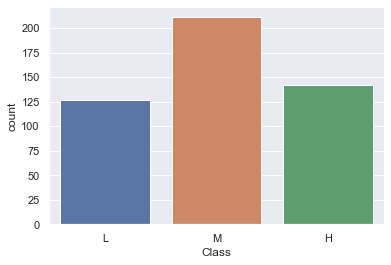

In [12]:
#检查数据集是否平衡

sns.countplot('Class',order = ['L','M','H'],data = df)

三类成绩分布的数量没有较大偏差，所以该数据集是一个样本均衡的数据集。

### 1.数据可视乎

下面对类别数据进行可视化，对特征与结果分布有一个直观的认识。

#### 3.1分类特征之间的可视化

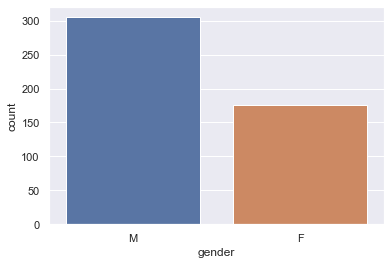

In [13]:
sns.countplot(x = 'gender',order = ['M','F'],data = df)

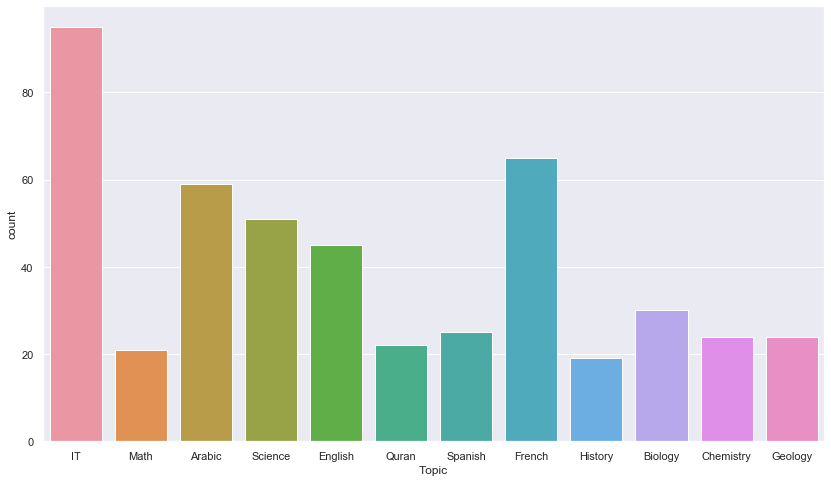

In [14]:
#了解学科的分布情况

sns.set(rc = {'figure.figsize':(14,8)})
sns.countplot(x = 'Topic',data = df)

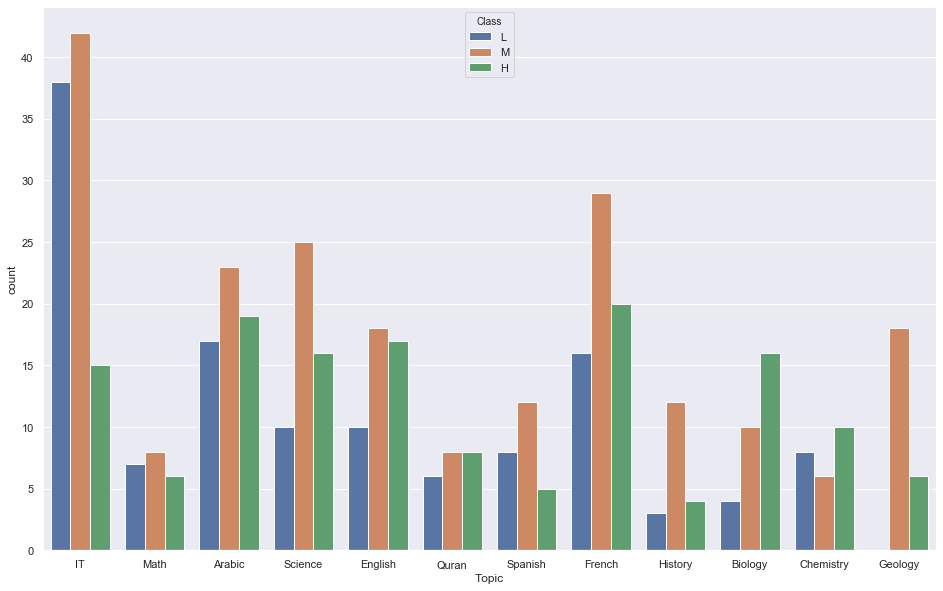

In [15]:
#了解课程和成绩的关系

sns.set(rc = {'figure.figsize':(16,10)})
sns.countplot(x = 'Topic',hue = 'Class',hue_order = ['L','M','H'],data = df)

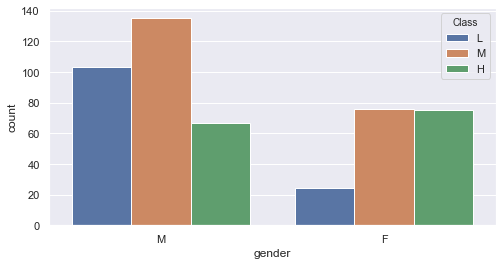

In [16]:
#了解性别和成绩的关系

sns.set(rc = {'figure.figsize':(8,4)})
sns.countplot(x = 'gender',hue = 'Class',hue_order = ['L','M','H'],data = df)

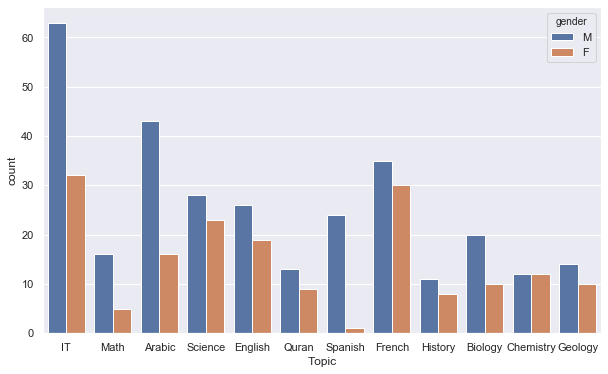

In [17]:
#了解性别和学科的相关性

sns.set(rc = {'figure.figsize':(10,6)})
sns.countplot(x = 'Topic',hue = 'gender',hue_order = ['M','F'],data = df)

In [18]:
df_temp = df[['Topic','gender']]
df_temp['Count'] = 1
df_temp = df_temp.groupby(['Topic','gender']).agg('sum').reset_index()
df_temp.head()

,Topic,gender,Count
0,Arabic,F,16
1,Arabic,M,43
2,Biology,F,10
3,Biology,M,20
4,Chemistry,F,12


In [20]:
df_temp2 = df_temp.groupby('Topic').agg('sum').reset_index()
df_temp2.head()

,Topic,Count
0,Arabic,59
1,Biology,30
2,Chemistry,24
3,English,45
4,French,65


In [21]:
df_temp = pd.merge(df_temp,df_temp2,on = 'Topic',how = 'left')
df_temp.head()

,Topic,gender,Count_x,Count_y
0,Arabic,F,16,59
1,Arabic,M,43,59
2,Biology,F,10,30
3,Biology,M,20,30
4,Chemistry,F,12,24


In [22]:
df_temp['gender proportion in topic'] = df_temp['Count_x']/df_temp['Count_y']
df_temp.head()

,Topic,gender,Count_x,Count_y,gender proportion in topic
0,Arabic,F,16,59,0.271186
1,Arabic,M,43,59,0.728814
2,Biology,F,10,30,0.333333
3,Biology,M,20,30,0.666667
4,Chemistry,F,12,24,0.500000


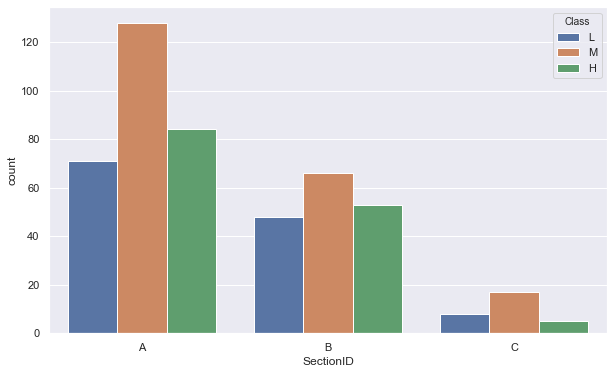

In [23]:
#了解班级和成绩的相关性

sns.countplot(x = 'SectionID',hue = 'Class',hue_order = ['L','M','H'],data = df)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
gender                      480 non-null object
NationalITy                 480 non-null object
PlaceofBirth                480 non-null object
StageID                     480 non-null object
GradeID                     480 non-null object
SectionID                   480 non-null object
Topic                       480 non-null object
Semester                    480 non-null object
Relation                    480 non-null object
raisedhands                 480 non-null int64
VisITedResources            480 non-null int64
AnnouncementsView           480 non-null int64
Discussion                  480 non-null int64
ParentAnsweringSurvey       480 non-null object
ParentschoolSatisfaction    480 non-null object
StudentAbsenceDays          480 non-null object
Class                       480 non-null object
dtypes: int64(4), object(13)
memory usage: 63.8+ KB


#### 1.2分类型特征和数字型特征之间的可视化

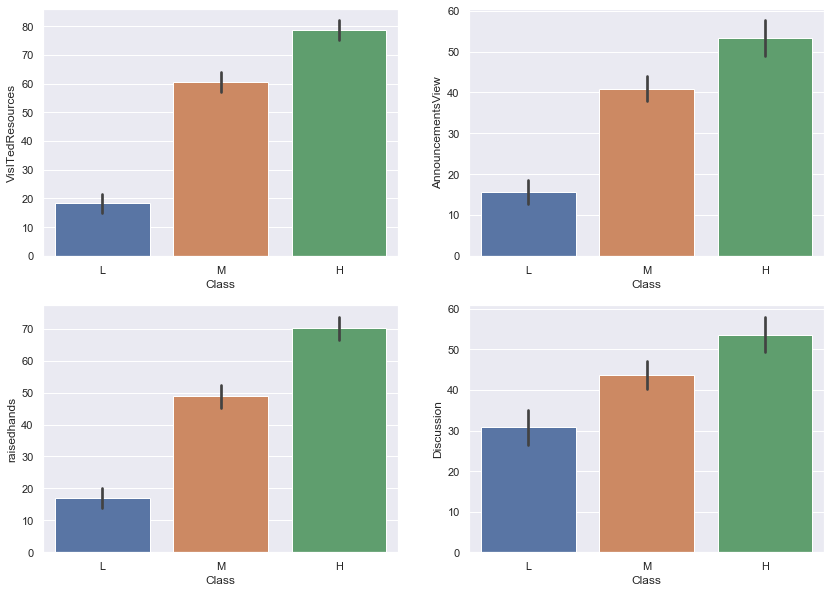

In [25]:
fig,axes = plt.subplots(2,2,figsize = (14,10))

sns.barplot(x = 'Class',y = 'VisITedResources',data = df,order = ['L','M','H'],ax = axes[0,0])
sns.barplot(x = 'Class',y = 'AnnouncementsView',data = df,order = ['L','M','H'],ax = axes[0,1])
sns.barplot(x = 'Class',y = 'raisedhands',data = df,order = ['L','M','H'],ax = axes[1,0])
sns.barplot(x = 'Class',y = 'Discussion',data = df,order = ['L','M','H'],ax = axes[1,1])

从上图可以看出，查看课件、学校公告、课堂发言、参与讨论的数量都对最终的成绩有积极影响。

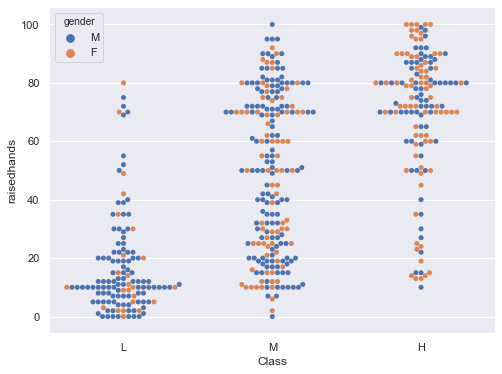

In [26]:
#了解不同性别，举手次数对学习成绩的影响

sns.set(rc = {'figure.figsize':(8,6)})
sns.swarmplot(x = 'Class',y = 'raisedhands',hue = 'gender',order = ['L','M','H'],data = df)

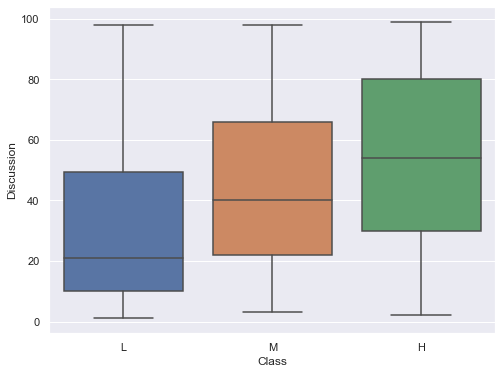

In [27]:
#了解上课参与讨论的积极程度与成绩的关系

sns.set(rc = {'figure.figsize':(8,6)})
sns.boxplot(x = 'Class',y = 'Discussion',order = ['L','M','H'],data = df)

从上图可以看出，参与课堂讨论的次数越多，其相应的成绩也越高。

#### 3.3数字型特征之间的可视化

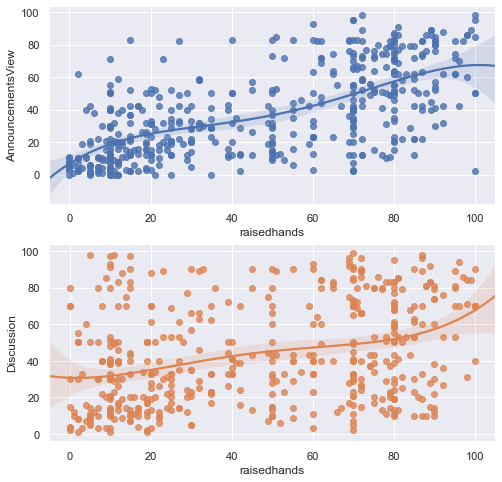

In [28]:
fig,axes = plt.subplots(2,1,figsize = (8,8))

sns.regplot(x = 'raisedhands',y = 'AnnouncementsView',order = 4,data = df,ax = axes[0])
sns.regplot(x = 'raisedhands',y = 'Discussion',order = 4,data = df,ax = axes[1])

In [29]:
#相关性矩阵（correlation matrix）

corr = df[['raisedhands','Discussion','VisITedResources','AnnouncementsView']].corr()
corr

,raisedhands,Discussion,VisITedResources,AnnouncementsView
raisedhands,1.000000,0.339386,0.691572,0.643918
Discussion,0.339386,1.000000,0.243292,0.417290
VisITedResources,0.691572,0.243292,1.000000,0.594500
AnnouncementsView,0.643918,0.417290,0.594500,1.000000


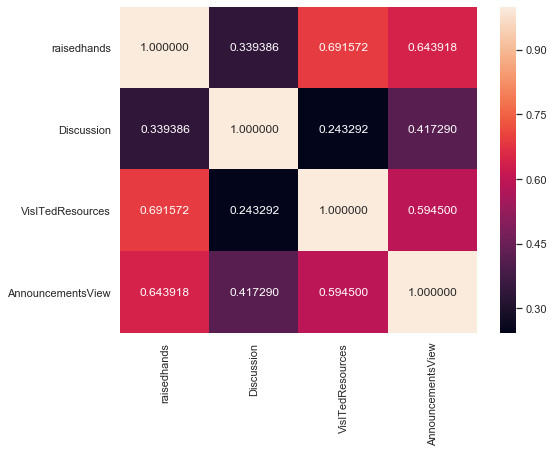

In [30]:
#相关性矩阵的可视化

sns.heatmap(corr,fmt = 'f',annot = True,xticklabels = corr.columns,yticklabels = corr.columns)

### 2.模型训练

#### 2.1原始数据建模

In [31]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [34]:
labels = df['Class']
features = df.drop('Class',axis = 1)
features = pd.get_dummies(features)

train_features,test_features,train_labels,test_labels = train_test_split(features,labels,test_size = 0.3,random_state = 0)

print('训练样本的大小:',train_features.shape)
print('训练标签的大小:',train_labels.shape)
print('测试样本的大小:',test_features.shape)
print('测试标签的大小:',test_labels.shape)

训练样本的大小: (336, 72)
训练标签的大小: (336,)
测试样本的大小: (144, 72)
测试标签的大小: (144,)


In [35]:
#导入逻辑回归模型

LR = LogisticRegression()
LR.fit(train_features,train_labels)
prediction = LR.predict(test_features)

score = accuracy_score(prediction,test_labels)
print(score)

0.6944444444444444


#### 2.2删除部分特征建模

In [36]:
df2 = df

labels2 = df2['Class']
features2 = df2.drop('Class',axis = 1)

#删除部分特征
features2 = features2.drop(['StageID','GradeID','SectionID'],axis = 1)

features2 = pd.get_dummies(features2)

#切分训练集个测试集
train_features2,test_features2,train_labels2,test_labels2 = train_test_split(features2,labels2,test_size = 0.3,random_state = 0)

print('训练样本的大小:',train_features2.shape)
print('训练标签的大小:',train_labels2.shape)
print('测试样本的大小:',test_features2.shape)
print('测试标签的大小:',test_labels2.shape)


训练样本的大小: (336, 56)
训练标签的大小: (336,)
测试样本的大小: (144, 56)
测试标签的大小: (144,)


In [37]:
LR2 = LogisticRegression()
LR2.fit(train_features2,train_labels2)
prediction2 = LR2.predict(test_features2)

score2 = accuracy_score(prediction2,test_labels2)
print(score2)

0.6805555555555556


#### 2.3增加新特征

In [38]:
df3 = df
labels3 = df3['Class']
df3['DiscussionPlusVisit'] = df3['Discussion'] + df3['VisITedResources']
features3 = df3.drop('Class',axis = 1)
features3 = features3.drop(['StageID','GradeID','SectionID'],axis = 1)

features3 = pd.get_dummies(features3)

#切分训练集个测试集
train_features3,test_features3,train_labels3,test_labels3 = train_test_split(features3,labels3,test_size = 0.3,random_state = 0)

print('训练样本的大小:',train_features3.shape)
print('训练标签的大小:',train_labels3.shape)
print('测试样本的大小:',test_features3.shape)
print('测试标签的大小:',test_labels3.shape)

训练样本的大小: (336, 57)
训练标签的大小: (336,)
测试样本的大小: (144, 57)
测试标签的大小: (144,)


In [40]:
LR3 = LogisticRegression()
LR3.fit(train_features3,train_labels3)
prediction3 = LR3.predict(test_features3)

score3 = accuracy_score(prediction3,test_labels3)
print(score3)

0.6805555555555556


### 3.集成算法

In [41]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators = 100)
RF.fit(train_features,train_labels)
RF_prediction = RF.predict(test_features)

RF_score = accuracy_score(RF_prediction,test_labels)
print(RF_score)

0.8055555555555556


In [49]:
feature_importance = pd.DataFrame({'feature':features.columns,'importance':RF.feature_importances_})
feature_importance = feature_importance.sort_values(by = 'importance',ascending = False)
feature_importance

,feature,importance
1,VisITedResources,0.125528
0,raisedhands,0.121202
2,AnnouncementsView,0.102578
3,Discussion,0.072496
70,StudentAbsenceDays_Above-7,0.071229
71,StudentAbsenceDays_Under-7,0.061473
64,Relation_Father,0.030665
66,ParentAnsweringSurvey_No,0.026344
67,ParentAnsweringSurvey_Yes,0.026094
65,Relation_Mum,0.025920


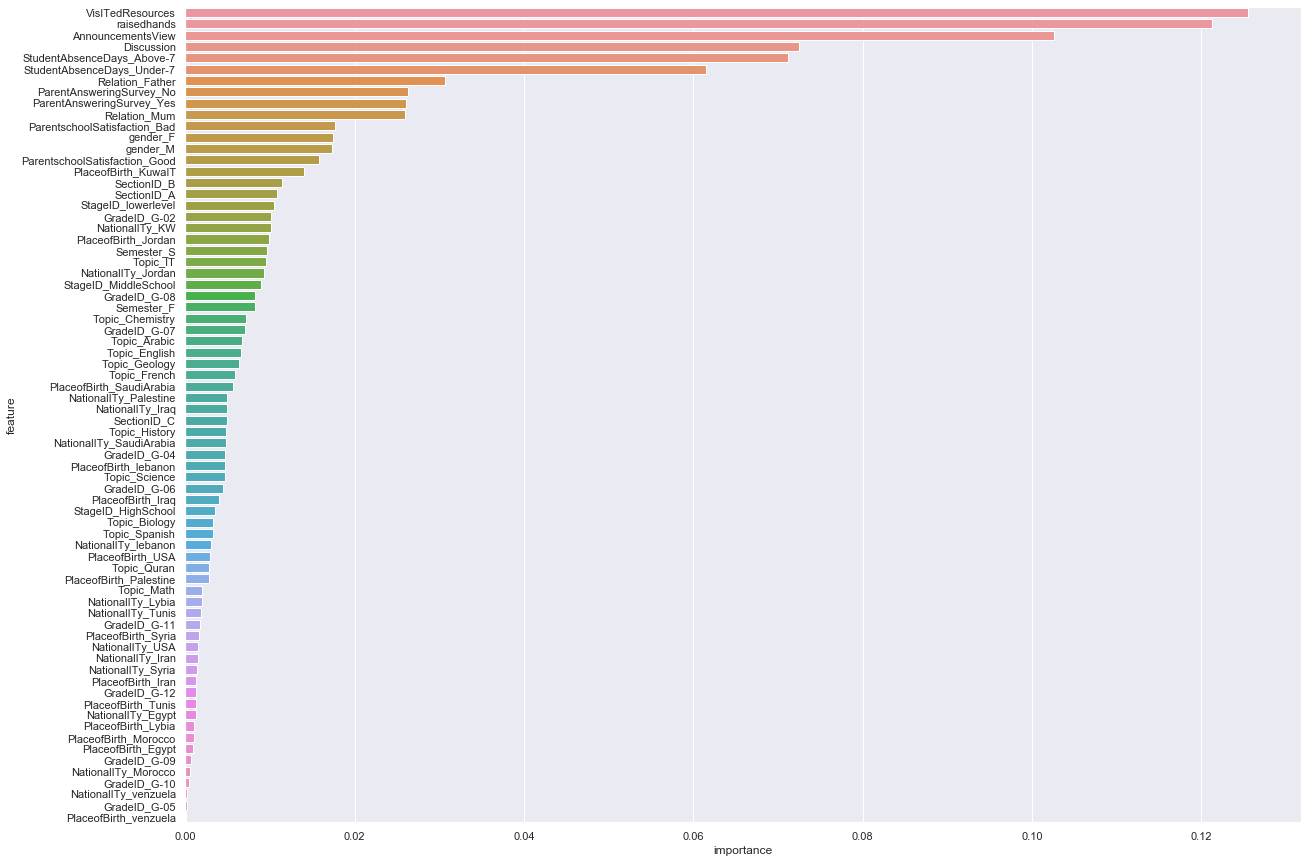

In [60]:
sns.set(rc = {'figure.figsize':(20,15)})

sns.barplot(y = 'feature',x = 'importance',data = feature_importance)